0   1  3
0  71  48  1
1  72  18  1
2  88  32  1
3  94  44  1
4  79  49  1


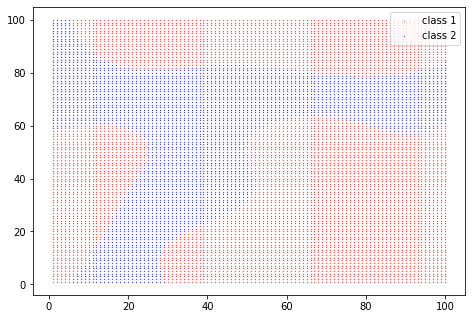

In [7]:
import numpy as np
import pandas as pd
import random

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from  sklearn.metrics import recall_score
import matplotlib.pyplot as plt

df = pd.read_excel("HW2Data.xlsx", header = None, usecols = [0, 1, 3])
df.reset_index(drop = True)
print(df.head())

df_features = df[[0, 1]]
df_class = df[[3]]

x_train, x_test, y_train, y_test = train_test_split(df_features, df_class, test_size = 0.25, random_state = 0)

reg = [100, 150, 200, 250, 300, 350]
accu_list = []
prec_list = []
reca_list = []

for c in reg:
    clf = svm.SVC(kernel= "rbf", C = c)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    #print(c)
    #print("confusion matrix")
    #print(confusion_matrix(y_test, y_pred))
    #print("\nclassification report")
    #print(classification_report(y_test,y_pred))
    a = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    accu_list.append(a)
    prec_list.append(p)
    reca_list.append(r)

#plt.plot(reg, reca_list, "bs", label = "recall")
#plt.ylabel("recall score")
#plt.xlabel("regulation parameter")
#plt.legend(loc = "best")
#plt.show

#C = 300

grid_x = list(range(1, 101, 1))
grid_y = list(range(1, 101, 1))

xx, yy = np.meshgrid(grid_x, grid_y, sparse = False, indexing = "xy")
x = list(xx.flatten("C"))
y = list(yy.flatten("C"))
df2_test = pd.DataFrame(list(zip(x, y)))

clf2 = svm.SVC(kernel= "rbf", C = 300)
clf2.fit(x_train, y_train)
y2_pred = clf2.predict(df2_test)

x1 = []
x2 = []
y1 = []
y2 = []

for i in range(0, 100*100):
    if y2_pred[i] == 1:
        x1.append(x[i])
        y1.append(y[i])
    else:
        x2.append(x[i])
        y2.append(y[i])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(x1, y1, s = 0.1, color = "r", label = "class 1")
ax.scatter(x2, y2, s = 0.1, color = "b", label = "class 2")
plt.legend(loc = "best")
plt.show()
